In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

In [2]:
data=pd.read_csv("C:\\Users\\ushak\\Desktop\\internship_project\\Video_Games_Sales_as_at_22_Dec_2016.csv")

In [3]:
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8.0,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,73.0,8.0,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,NaN,NaN,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01


In [4]:
data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
Global_Sales       float64
dtype: object

In [5]:
data.describe(include=['float64'])

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000,16719.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,68.967679,26.360821,7.125046,162.229908,0.533543
std,5.878995,0.813514,0.503283,0.308818,0.186710,13.938165,18.980495,1.500006,561.282326,1.547935
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,3.000000,0.000000,4.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,12.000000,6.400000,10.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,21.000000,7.500000,24.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,36.000000,8.200000,81.000000,0.470000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,98.000000,113.000000,9.700000,10665.000000,82.530000


In [6]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
Global_Sales          0
dtype: int64

In [7]:
data.select_dtypes(include='object').nunique()

Name         11562
Platform        31
Genre           12
Publisher      582
Developer     1696
Rating           8
dtype: int64

In [8]:
data1=data.dropna(subset=['Year_of_Release'],how='all')
data2=data1.dropna(subset=['Publisher'],how='all')
data3=data2.dropna(subset=['Name'],how='all')
data4=data3.dropna(subset=['Developer'],how='all')
data5=data4.dropna(subset=['Rating'],how='all')
data6=data5.dropna(subset=['Critic_Score'],how='all')
data7=data6.dropna(subset=['User_Score'],how='all')
data8=data7.dropna(subset=['User_Count'],how='all')
data9=data8.dropna(subset=['Critic_Count'],how='all')

In [9]:
data9.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
Global_Sales       0
dtype: int64

In [10]:
print(data9.duplicated().sum())

0


In [11]:
d=data9.sort_values(by='Year_of_Release')
d

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
14472,Alter Ego,PC,1985.0,Simulation,Activision,0.00,0.03,0.00,0.01,59.0,9.0,5.8,19.0,"Viva Media, Viva Media, LLC",T,0.03
14623,SimCity,PC,1988.0,Simulation,Maxis,0.00,0.02,0.00,0.01,64.0,75.0,2.2,4572.0,Maxis,E10+,0.03
14612,Doom,PC,1992.0,Shooter,id Software,0.02,0.00,0.00,0.00,85.0,44.0,8.2,1796.0,id Software,M,0.03
1567,Battle Arena Toshinden,PS,1994.0,Fighting,Sony Computer Entertainment,0.39,0.26,0.53,0.08,69.0,4.0,6.3,4.0,Tamsoft,T,1.27
1160,Diablo,PC,1996.0,Role-Playing,Activision,0.01,1.58,0.00,0.00,94.0,12.0,8.7,850.0,Blizzard Entertainment,M,1.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5990,UEFA Euro 2016,PS4,2016.0,Sports,Konami Digital Entertainment,0.00,0.22,0.04,0.04,72.0,7.0,6.6,8.0,Konami,E,0.29
15582,Mighty No. 9,XOne,2016.0,Platform,Deep Silver,0.02,0.00,0.00,0.00,55.0,13.0,4.2,94.0,Inti Creates,E10+,0.02
8900,LEGO Harry Potter Collection,PS4,2016.0,Action,Warner Bros. Interactive Entertainment,0.01,0.11,0.00,0.02,73.0,16.0,8.1,7.0,Warner Bros. Interactive Entertainment,E10+,0.15
5008,Deus Ex: Mankind Divided,PS4,2016.0,Role-Playing,Square Enix,0.11,0.21,0.00,0.06,84.0,59.0,7.6,511.0,Eidos Montreal,M,0.38


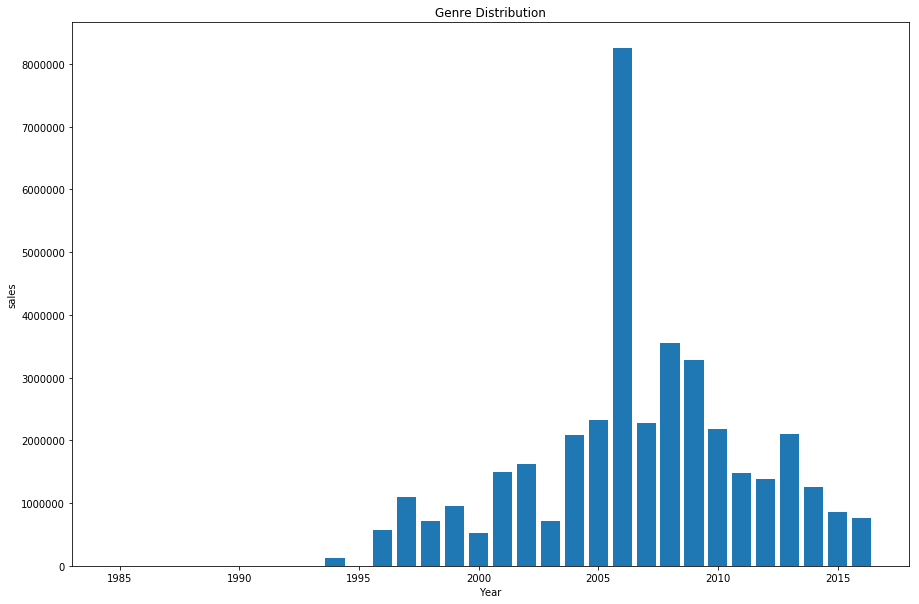

In [12]:
plt.figure(figsize=(15,10))
plt.bar(d['Year_of_Release'],(d['Global_Sales']*100000))
plt.title('Genre Distribution')
plt.xlabel('Year')
plt.ylabel('sales')
plt.show()

In [13]:
d.shape

(6825, 16)

In [14]:
d.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Developer', 'Rating', 'Global_Sales'],
      dtype='object')

In [15]:
d.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
Global_Sales       float64
dtype: object

In [16]:
scaler = RobustScaler()
d[['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Critic_Score','User_Score','Critic_Count','User_Count', 'Global_Sales']] = scaler.fit_transform(d[['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Critic_Score','User_Score','Critic_Count','User_Count','Global_Sales']])


In [17]:
d

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
14472,Alter Ego,PC,-3.142857,Simulation,Activision,-0.454545,-0.157895,0.0,-0.166667,-0.722222,-0.64,-1.000000,-0.102564,"Viva Media, Viva Media, LLC",T,-0.406250
14623,SimCity,PC,-2.714286,Simulation,Maxis,-0.454545,-0.210526,0.0,-0.166667,-0.444444,2.00,-3.117647,58.269231,Maxis,E10+,-0.406250
14612,Doom,PC,-2.142857,Shooter,id Software,-0.393939,-0.315789,0.0,-0.333333,0.722222,0.76,0.411765,22.679487,id Software,M,-0.406250
1567,Battle Arena Toshinden,PS,-1.857143,Fighting,Sony Computer Entertainment,0.727273,1.052632,53.0,1.000000,-0.166667,-0.84,-0.705882,-0.294872,Tamsoft,T,1.531250
1160,Diablo,PC,-1.571429,Role-Playing,Activision,-0.424242,8.000000,0.0,-0.333333,1.222222,-0.52,0.705882,10.551282,Blizzard Entertainment,M,2.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5990,UEFA Euro 2016,PS4,1.285714,Sports,Konami Digital Entertainment,-0.454545,0.842105,4.0,0.333333,0.000000,-0.72,-0.529412,-0.243590,Konami,E,0.000000
15582,Mighty No. 9,XOne,1.285714,Platform,Deep Silver,-0.393939,-0.315789,0.0,-0.333333,-0.944444,-0.48,-1.941176,0.858974,Inti Creates,E10+,-0.421875
8900,LEGO Harry Potter Collection,PS4,1.285714,Action,Warner Bros. Interactive Entertainment,-0.424242,0.263158,0.0,0.000000,0.055556,-0.36,0.352941,-0.256410,Warner Bros. Interactive Entertainment,E10+,-0.218750
5008,Deus Ex: Mankind Divided,PS4,1.285714,Role-Playing,Square Enix,-0.121212,0.789474,0.0,0.666667,0.666667,1.36,0.058824,6.205128,Eidos Montreal,M,0.140625


In [18]:
# Select columns to encode
columns_to_encode = ['Platform', 'Rating','Genre']

# Perform one hot encoding
one_hot_encoded = pd.get_dummies(d[columns_to_encode])

# Combine one hot encoded columns with original data
data_encoded = pd.concat([d, one_hot_encoded], axis=1)

# Remove original categorical columns
data_encoded.drop(d[columns_to_encode], axis=1, inplace=True)

# View the encoded data
data_encoded.head()

,Name,Year_of_Release,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
14472,Alter Ego,-3.142857,Activision,-0.454545,-0.157895,0.0,-0.166667,-0.722222,-0.64,-1.000000,...,0,0,0,0,0,0,0,1,0,0
14623,SimCity,-2.714286,Maxis,-0.454545,-0.210526,0.0,-0.166667,-0.444444,2.00,-3.117647,...,0,0,0,0,0,0,0,1,0,0
14612,Doom,-2.142857,id Software,-0.393939,-0.315789,0.0,-0.333333,0.722222,0.76,0.411765,...,0,0,0,0,0,0,1,0,0,0
1567,Battle Arena Toshinden,-1.857143,Sony Computer Entertainment,0.727273,1.052632,53.0,1.000000,-0.166667,-0.84,-0.705882,...,1,0,0,0,0,0,0,0,0,0
1160,Diablo,-1.571429,Activision,-0.424242,8.000000,0.0,-0.333333,1.222222,-0.52,0.705882,...,0,0,0,0,0,1,0,0,0,0


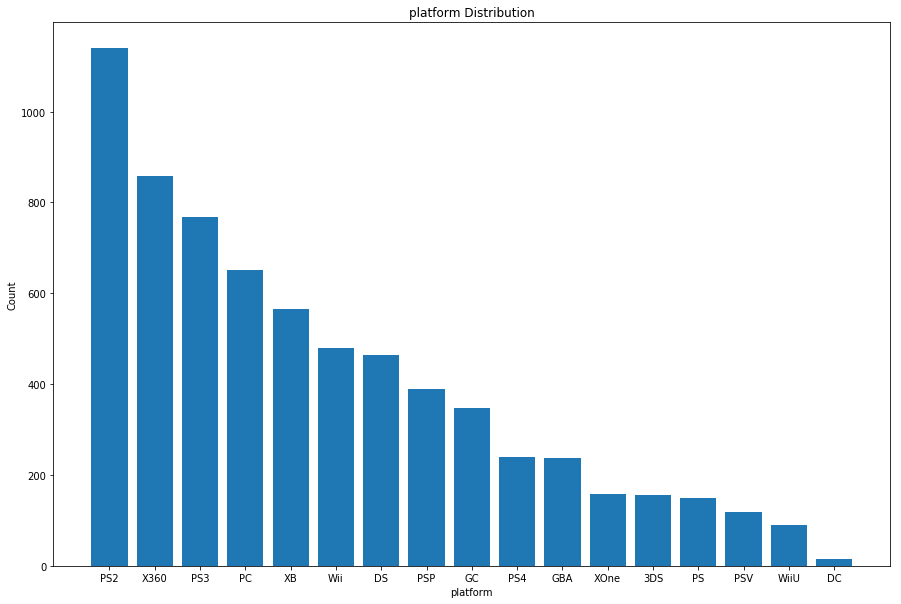

In [19]:
platform_count=d['Platform'].value_counts()
plt.figure(figsize=(15,10))
plt.bar(platform_count.index,platform_count.values)
plt.title('platform Distribution')
plt.xlabel('platform')
plt.ylabel('Count')
plt.show()

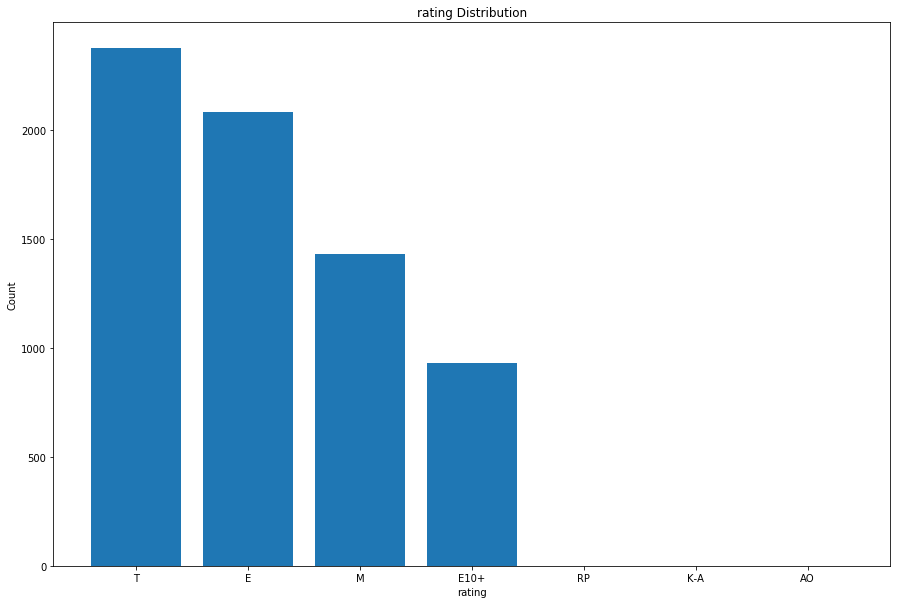

In [20]:
rating_count=d['Rating'].value_counts()
plt.figure(figsize=(15,10))
plt.bar(rating_count.index,rating_count.values)
plt.title('rating Distribution')
plt.xlabel('rating')
plt.ylabel('Count')
plt.show()

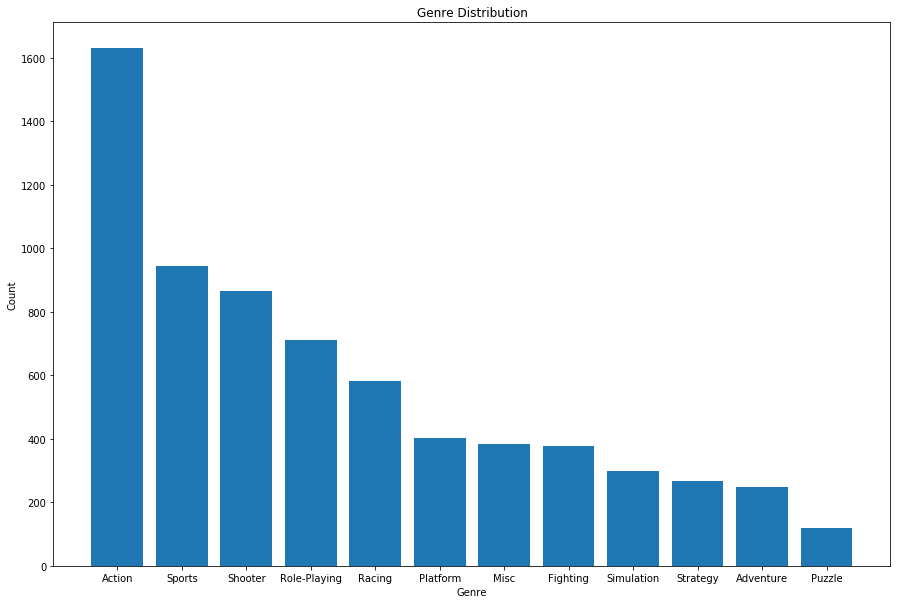

In [21]:
genre_counts=d['Genre'].value_counts()
plt.figure(figsize=(15,10))
plt.bar(genre_counts.index, genre_counts.values)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [22]:
corrr=data_encoded.corr().abs()

In [23]:
corrr

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
Year_of_Release,1.000000,0.016239,0.041346,0.038443,0.042315,0.007661,0.203336,0.253914,0.199348,0.006661,...,0.018118,0.028883,0.065249,0.014025,0.076027,0.028687,0.017541,0.041908,0.059379,0.031159
NA_Sales,0.016239,1.000000,0.841808,0.468607,0.726757,0.233580,0.283917,0.085796,0.246208,0.955793,...,0.008427,0.046387,0.022249,0.015164,0.001957,0.030397,0.049164,0.018592,0.037540,0.056310
EU_Sales,0.041346,0.841808,1.000000,0.519929,0.716330,0.213102,0.265740,0.055915,0.283504,0.939313,...,0.026789,0.027572,0.012134,0.006245,0.021002,0.034101,0.036634,0.002956,0.015320,0.041592
JP_Sales,0.038443,0.468607,0.519929,1.000000,0.394823,0.147314,0.168299,0.127521,0.072773,0.613546,...,0.008016,0.018980,0.037256,0.028964,0.017375,0.128004,0.056488,0.017745,0.038335,0.033614
Other_Sales,0.042315,0.726757,0.716330,0.394823,1.000000,0.191509,0.239513,0.057083,0.240085,0.804028,...,0.014509,0.020411,0.001817,0.014271,0.019952,0.032872,0.026889,0.019734,0.025310,0.043309
Critic_Score,0.007661,0.233580,0.213102,0.147314,0.191509,1.000000,0.396478,0.580318,0.265639,0.237556,...,0.009416,0.049496,0.004915,0.004044,0.016018,0.062710,0.019475,0.004651,0.112566,0.041490
Critic_Count,0.203336,0.283917,0.265740,0.168299,0.239513,0.396478,1.000000,0.195087,0.365603,0.290397,...,0.000732,0.052117,0.027979,0.002449,0.048371,0.072987,0.162076,0.062674,0.116341,0.005283
User_Score,0.253914,0.085796,0.055915,0.127521,0.057083,0.580318,0.195087,1.000000,0.017546,0.088349,...,0.019546,0.056960,0.033325,0.006008,0.017229,0.102613,0.026221,0.001631,0.020804,0.023429
User_Count,0.199348,0.246208,0.283504,0.072773,0.240085,0.265639,0.365603,0.017546,1.000000,0.264151,...,0.044594,0.058726,0.025645,0.031674,0.052437,0.090922,0.141083,0.029759,0.088235,0.014901
Global_Sales,0.006661,0.955793,0.939313,0.613546,0.804028,0.237556,0.290397,0.088349,0.264151,1.000000,...,0.014349,0.038108,0.020400,0.007360,0.006536,0.012762,0.032463,0.010332,0.021753,0.053122


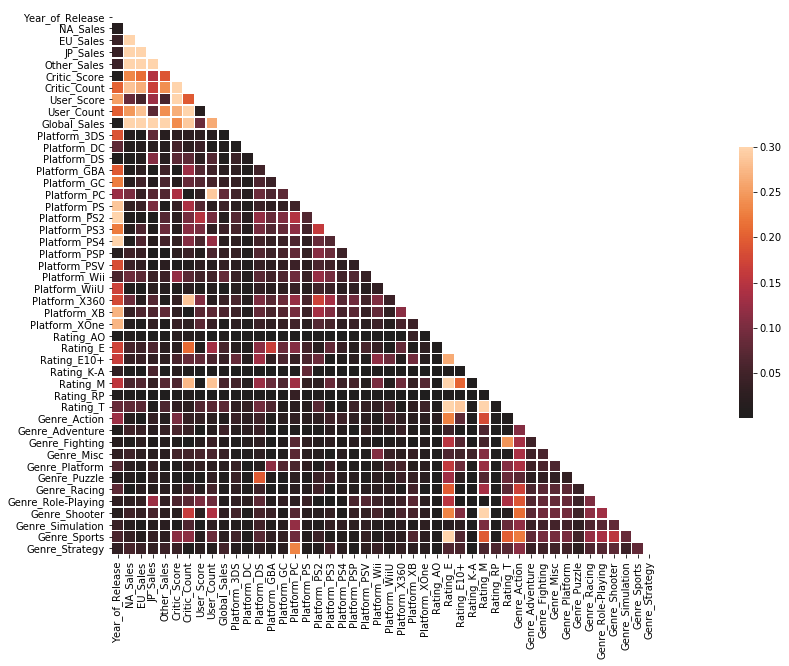

In [24]:
mask = np.triu(np.ones_like(corrr, dtype=bool))
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(corrr, mask=mask,vmax=.3, center=0,
            square=True, linewidths=.60, cbar_kws={"shrink": .5})
plt.show()

In [25]:
corr_with_target = corrr['Global_Sales'].sort_values(ascending=False)

In [26]:
c=pd.DataFrame(corr_with_target[corr_with_target<0.04])

In [27]:
c

,Global_Sales
Rating_E10+,0.039724
Genre_Misc,0.038108
Platform_GC,0.037720
Platform_PSP,0.037084
Platform_PSV,0.034854
Genre_Shooter,0.032463
Platform_PS4,0.023216
Genre_Sports,0.021753
Platform_GBA,0.021416
Genre_Platform,0.020400


In [28]:
tr=data_encoded.drop(['Year_of_Release','Name','Critic_Score','Critic_Count','Developer','JP_Sales','Publisher','Platform_PSP','Platform_GC','Platform_PSV','Genre_Platform','Platform_PS2','Genre_Sports','Genre_Simulation','Rating_E','Rating_K-A','Platform_XOne','Rating_AO','Platform_DC','Platform_3DS','Genre_Role-Playing','Genre_Racing','Genre_Fighting','Rating_RP','Genre_Action','Genre_Misc','Platform_WiiU','Genre_Shooter','Rating_T','Genre_Strategy','Platform_PS','Platform_X360','Genre_Puzzle','Platform_GBA','Critic_Score','Critic_Count'],axis=1)

In [29]:
tr

,NA_Sales,EU_Sales,Other_Sales,User_Score,User_Count,Global_Sales,Platform_DS,Platform_PC,Platform_PS3,Platform_PS4,Platform_Wii,Platform_XB,Rating_E10+,Rating_M,Genre_Adventure
14472,-0.454545,-0.157895,-0.166667,-1.000000,-0.102564,-0.406250,0,1,0,0,0,0,0,0,0
14623,-0.454545,-0.210526,-0.166667,-3.117647,58.269231,-0.406250,0,1,0,0,0,0,1,0,0
14612,-0.393939,-0.315789,-0.333333,0.411765,22.679487,-0.406250,0,1,0,0,0,0,0,1,0
1567,0.727273,1.052632,1.000000,-0.705882,-0.294872,1.531250,0,0,0,0,0,0,0,0,0
1160,-0.424242,8.000000,-0.333333,0.705882,10.551282,2.031250,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5990,-0.454545,0.842105,0.333333,-0.529412,-0.243590,0.000000,0,0,0,1,0,0,0,0,0
15582,-0.393939,-0.315789,-0.333333,-1.941176,0.858974,-0.421875,0,0,0,0,0,0,1,0,0
8900,-0.424242,0.263158,0.000000,0.352941,-0.256410,-0.218750,0,0,0,1,0,0,1,0,0
5008,-0.121212,0.789474,0.666667,0.058824,6.205128,0.140625,0,0,0,1,0,0,0,1,0


In [30]:
num=tr.select_dtypes(include=['float64','int64']).abs()

In [31]:
num.columns

Index(['NA_Sales', 'EU_Sales', 'Other_Sales', 'User_Score', 'User_Count',
       'Global_Sales'],
      dtype='object')

In [32]:
columns_to_delete = ['NA_Sales','EU_Sales', 'Other_Sales','User_Score','User_Count','Global_Sales']

C:\Users\ushak\programming\New folder\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


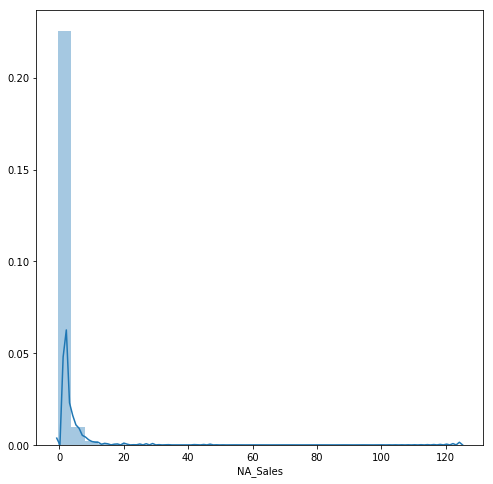

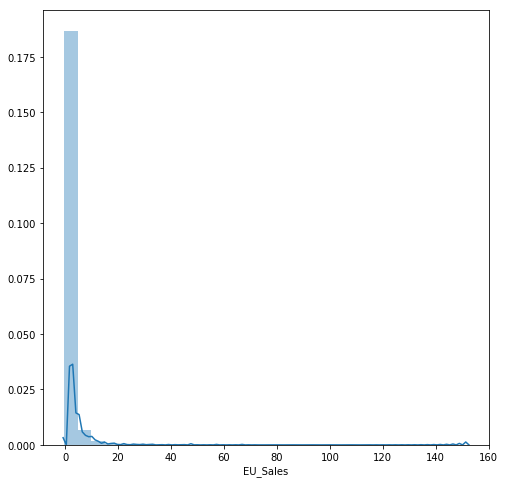

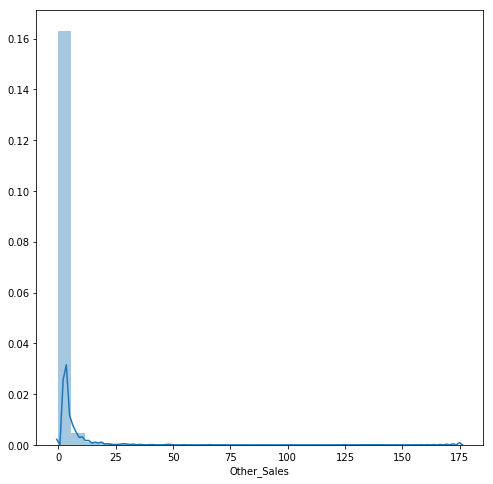

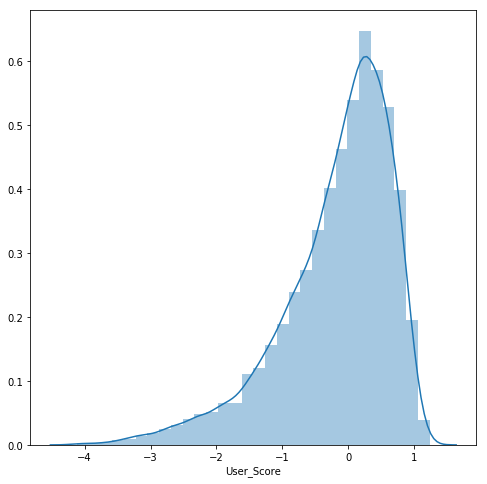

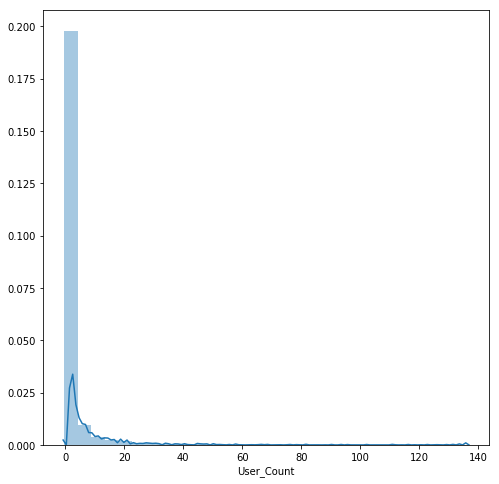

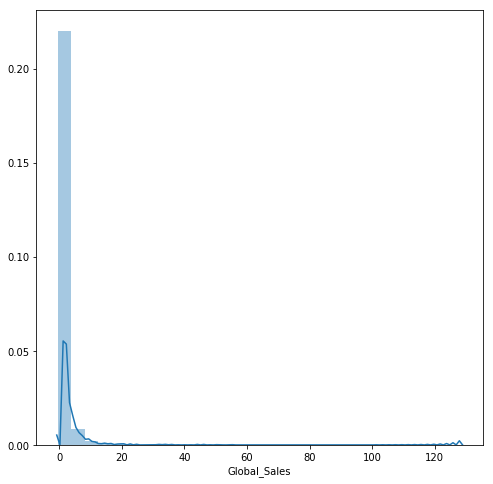

In [33]:
for col in columns_to_delete:
    plt.figure(figsize = (8, 8))
    sns.distplot(tr[col],bins=30)
    plt.show()

In [34]:
columns_to_transform =['NA_Sales', 'Other_Sales','Global_Sales','User_Score','EU_Sales']
tr[columns_to_transform]= tr[columns_to_transform]+ 0.1

In [35]:
tr[['NA_Sales', 'Other_Sales','Global_Sales','User_Score','EU_Sales']]=tr[['NA_Sales', 'Other_Sales','Global_Sales','User_Score','EU_Sales']].abs()

In [36]:
tr

,NA_Sales,EU_Sales,Other_Sales,User_Score,User_Count,Global_Sales,Platform_DS,Platform_PC,Platform_PS3,Platform_PS4,Platform_Wii,Platform_XB,Rating_E10+,Rating_M,Genre_Adventure
14472,0.354545,0.057895,0.066667,0.900000,-0.102564,0.306250,0,1,0,0,0,0,0,0,0
14623,0.354545,0.110526,0.066667,3.017647,58.269231,0.306250,0,1,0,0,0,0,1,0,0
14612,0.293939,0.215789,0.233333,0.511765,22.679487,0.306250,0,1,0,0,0,0,0,1,0
1567,0.827273,1.152632,1.100000,0.605882,-0.294872,1.631250,0,0,0,0,0,0,0,0,0
1160,0.324242,8.100000,0.233333,0.805882,10.551282,2.131250,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5990,0.354545,0.942105,0.433333,0.429412,-0.243590,0.100000,0,0,0,1,0,0,0,0,0
15582,0.293939,0.215789,0.233333,1.841176,0.858974,0.321875,0,0,0,0,0,0,1,0,0
8900,0.324242,0.363158,0.100000,0.452941,-0.256410,0.118750,0,0,0,1,0,0,1,0,0
5008,0.021212,0.889474,0.766667,0.158824,6.205128,0.240625,0,0,0,1,0,0,0,1,0


In [37]:
for col in columns_to_transform:
    tr[col] = np.log(tr[col])
    
   
    
tr

,NA_Sales,EU_Sales,Other_Sales,User_Score,User_Count,Global_Sales,Platform_DS,Platform_PC,Platform_PS3,Platform_PS4,Platform_Wii,Platform_XB,Rating_E10+,Rating_M,Genre_Adventure
14472,-1.036919,-2.849129,-2.708050,-0.105361,-0.102564,-1.183354,0,1,0,0,0,0,0,0,0
14623,-1.036919,-2.202502,-2.708050,1.104477,58.269231,-1.183354,0,1,0,0,0,0,1,0,0
14612,-1.224382,-1.533452,-1.455287,-0.669890,22.679487,-1.183354,0,1,0,0,0,0,0,1,0
1567,-0.189621,0.142048,0.095310,-0.501069,-0.294872,0.489347,0,0,0,0,0,0,0,0,0
1160,-1.126264,2.091864,-1.455287,-0.215818,10.551282,0.756709,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5990,-1.036919,-0.059638,-0.836248,-0.845339,-0.243590,-2.302585,0,0,0,1,0,0,0,0,0
15582,-1.224382,-1.533452,-1.455287,0.610405,0.858974,-1.133592,0,0,0,0,0,0,1,0,0
8900,-1.126264,-1.012918,-2.302585,-0.791993,-0.256410,-2.130735,0,0,0,1,0,0,1,0,0
5008,-3.853183,-0.117125,-0.265703,-1.839962,6.205128,-1.424516,0,0,0,1,0,0,0,1,0


C:\Users\ushak\programming\New folder\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


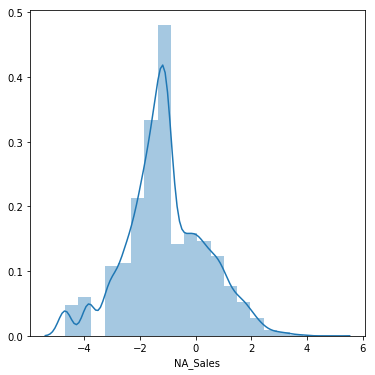

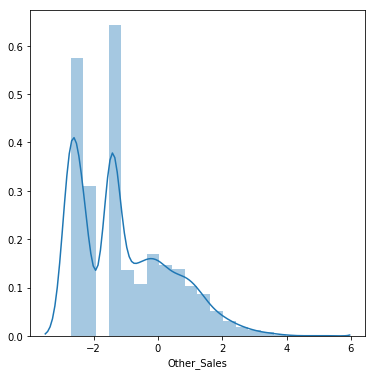

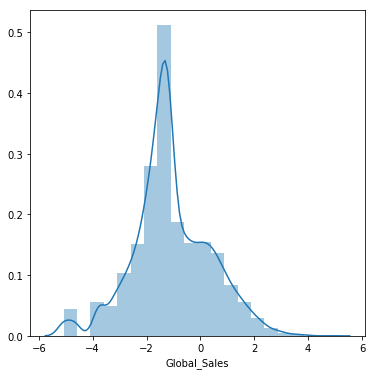

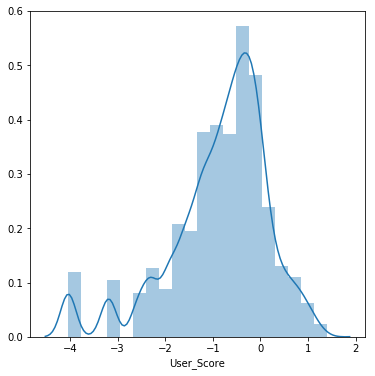

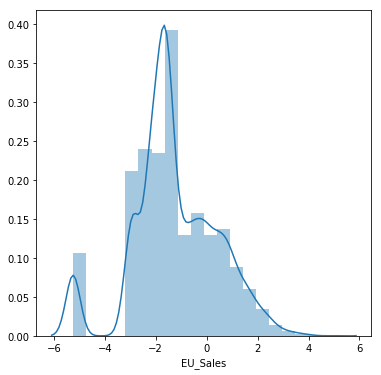

In [38]:
for col in columns_to_transform:
    plt.figure(figsize = (6,6))
    sns.distplot(tr[col],bins=20)
    plt.show()

In [39]:
tr

,NA_Sales,EU_Sales,Other_Sales,User_Score,User_Count,Global_Sales,Platform_DS,Platform_PC,Platform_PS3,Platform_PS4,Platform_Wii,Platform_XB,Rating_E10+,Rating_M,Genre_Adventure
14472,-1.036919,-2.849129,-2.708050,-0.105361,-0.102564,-1.183354,0,1,0,0,0,0,0,0,0
14623,-1.036919,-2.202502,-2.708050,1.104477,58.269231,-1.183354,0,1,0,0,0,0,1,0,0
14612,-1.224382,-1.533452,-1.455287,-0.669890,22.679487,-1.183354,0,1,0,0,0,0,0,1,0
1567,-0.189621,0.142048,0.095310,-0.501069,-0.294872,0.489347,0,0,0,0,0,0,0,0,0
1160,-1.126264,2.091864,-1.455287,-0.215818,10.551282,0.756709,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5990,-1.036919,-0.059638,-0.836248,-0.845339,-0.243590,-2.302585,0,0,0,1,0,0,0,0,0
15582,-1.224382,-1.533452,-1.455287,0.610405,0.858974,-1.133592,0,0,0,0,0,0,1,0,0
8900,-1.126264,-1.012918,-2.302585,-0.791993,-0.256410,-2.130735,0,0,0,1,0,0,1,0,0
5008,-3.853183,-0.117125,-0.265703,-1.839962,6.205128,-1.424516,0,0,0,1,0,0,0,1,0


In [40]:
tr[['NA_Sales', 'Other_Sales', 'User_Score', 'User_Count','Global_Sales','EU_Sales']]=tr[['NA_Sales', 'Other_Sales', 'User_Score', 'User_Count','Global_Sales','EU_Sales']].abs()

In [41]:
X = tr.drop(['Global_Sales'], axis=1)
y = tr[['Global_Sales']]


In [42]:
X

,NA_Sales,EU_Sales,Other_Sales,User_Score,User_Count,Platform_DS,Platform_PC,Platform_PS3,Platform_PS4,Platform_Wii,Platform_XB,Rating_E10+,Rating_M,Genre_Adventure
14472,1.036919,2.849129,2.708050,0.105361,0.102564,0,1,0,0,0,0,0,0,0
14623,1.036919,2.202502,2.708050,1.104477,58.269231,0,1,0,0,0,0,1,0,0
14612,1.224382,1.533452,1.455287,0.669890,22.679487,0,1,0,0,0,0,0,1,0
1567,0.189621,0.142048,0.095310,0.501069,0.294872,0,0,0,0,0,0,0,0,0
1160,1.126264,2.091864,1.455287,0.215818,10.551282,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5990,1.036919,0.059638,0.836248,0.845339,0.243590,0,0,0,1,0,0,0,0,0
15582,1.224382,1.533452,1.455287,0.610405,0.858974,0,0,0,0,0,0,1,0,0
8900,1.126264,1.012918,2.302585,0.791993,0.256410,0,0,0,1,0,0,1,0,0
5008,3.853183,0.117125,0.265703,1.839962,6.205128,0,0,0,1,0,0,0,1,0


In [43]:
y

,Global_Sales
14472,1.183354
14623,1.183354
14612,1.183354
1567,0.489347
1160,0.756709
...,...
5990,2.302585
15582,1.133592
8900,2.130735
5008,1.424516


In [44]:
# train and validation set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_trainval.shape

(5460, 14)

In [46]:
X_test.shape

(1365, 14)

In [47]:
y_trainval.shape

(5460, 1)

In [48]:
y_test.shape

(1365, 1)

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

In [50]:
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_val_poly=poly.fit_transform(X_val)
X_test_poly = poly.transform(X_test)



In [51]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [52]:
# r2 of train and val
y_val_pred = lr.predict(X_val_poly)
r2 = r2_score(y_val, y_val_pred)
print("R-squared score:", r2)

R-squared score: 0.42216262768062074


In [53]:
# mse of train and val
mse = mean_squared_error(y_val, y_val_pred)
print("Mean squared error:", mse)

Mean squared error: 0.5794204290101529


In [54]:
# r2 of test and pred (degree=1)
y_test_pred = lr.predict(X_test_poly)
r2 = r2_score(y_test, y_test_pred)
print("R-squared score:", r2)

R-squared score: 0.47639829264145994


In [55]:
# mse of test and pred (degree=1)
mse = mean_squared_error(y_test, y_test_pred)
print("Mean squared error:", mse)

Mean squared error: 0.5196431426196928


In [56]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)


In [57]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [59]:
# r2 of train and val
y_val_pred = lr.predict(X_val_poly)
r2 = r2_score(y_val, y_val_pred)
print("R-squared score:", r2)

R-squared score: 0.4865762048090505


In [60]:
# mse of train and val
mse = mean_squared_error(y_val, y_val_pred)
print("Mean squared error:", mse)

Mean squared error: 0.5148303829492266


In [61]:
# r2 of test and pred (degree=2)
y_test_pred2 = lr.predict(X_test_poly)
r2 = r2_score(y_test, y_test_pred2)
print("R-squared score:", r2)

R-squared score: 0.5373310734216417


In [62]:
# mse of test and pred (degree=1)
mse = mean_squared_error(y_test, y_test_pred2)
print("Mean squared error:", mse)

Mean squared error: 0.45917102946921223
